### Hierarchical Clutering

In [1]:
from warnings import filterwarnings 
filterwarnings('ignore') 

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['id','Gender','Age','Income','SpendScore']

In [4]:
df.head()

,id,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   SpendScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

id            0
Gender        0
Age           0
Income        0
SpendScore    0
dtype: int64

### Cluster similar customers together on basis of Income and SpendScore

In [7]:
X = df[['Income','Age','SpendScore']]
X.head()

,Income,Age,SpendScore
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40


### preprocess the x data

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [10]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-1.73899919, -1.42456879, -0.43480148],
       [-1.73899919, -1.28103541,  1.19570407],
       [-1.70082976, -1.3528021 , -1.71591298],
       [-1.70082976, -1.13750203,  1.04041783],
       [-1.66266033, -0.56336851, -0.39597992],
       [-1.66266033, -1.20926872,  1.00159627],
       [-1.62449091, -0.27630176, -1.71591298],
       [-1.62449091, -1.13750203,  1.70038436],
       [-1.58632148,  1.80493225, -1.83237767],
       [-1.58632148, -0.6351352 ,  0.84631002],
       [-1.58632148,  2.02023231, -1.4053405 ],
       [-1.58632148, -0.27630176,  1.89449216],
       [-1.54815205,  1.37433211, -1.36651894],
       [-1.54815205, -1.06573534,  1.04041783],
       [-1.54815205, -0.13276838, -1.44416206],
       [-1.54815205, -1.20926872,  1.11806095],
       [-1.50998262, -0.27630176, -0.59008772],
       [-1.50998262, -1.3528021 ,  0.61338066],
       [-1.43364376,  0.94373197, -0.82301709],
       [-1.43364376, -0.27630176,  1.8556706 ],
       [-1.39547433, -0.27630176, -0.590

### Apply Hierarchical Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
model.fit(X_pre)

AgglomerativeClustering(n_clusters=3)

In [12]:
lb = model.labels_
lb

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### Getting Silhoutte Score for the above Clustering

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X_pre, lb)

0.32148866683112387

### Check the different number of cluster

In [14]:
list(range(2,11))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [15]:
from sklearn.metrics import silhouette_score
scores = []
for i in range(2,11):
    agc = AgglomerativeClustering(n_clusters=i)
    agc.fit(X_pre)
    lb = agc.labels_
    s = silhouette_score(X_pre, lb)
    scores.append(s)


In [16]:
scores

[0.31795733680759597,
 0.32148866683112387,
 0.3614512741691407,
 0.39002826186267214,
 0.4201169558789579,
 0.3982948069934959,
 0.36647935858620495,
 0.3753854624760522,
 0.3808885873908943]

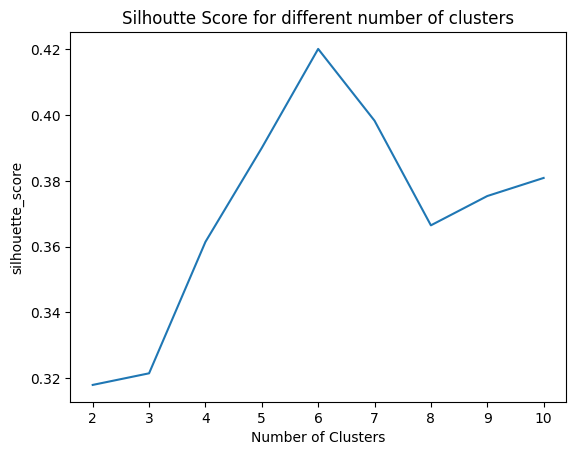

In [17]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)),scores)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_score')
plt.title('Silhoutte Score for different number of clusters')
plt.show()

### Create a final model wich has highest silhouette Score

In [18]:
best_agc = AgglomerativeClustering(n_clusters=6)
best_agc.fit(X_pre)

AgglomerativeClustering(n_clusters=6)

In [19]:
final_lb = best_agc.labels_
final_lb

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

### Add this label to X

In [20]:
X['label']=final_lb

In [21]:
X

,Income,Age,SpendScore,label
0,15,19,39,4
1,15,21,81,5
2,16,20,6,4
3,16,23,77,5
4,17,31,40,4
...,...,...,...,...
195,120,35,79,2
196,126,45,28,3
197,126,32,74,2
198,137,32,18,3


In [23]:
for i in range(6):
    print(f'Customer Label : {i}\n')
    display(X[X['label']==i])
    print('\n================================\n')

Customer Label : 0



,Income,Age,SpendScore,label
27,28,35,61,0
43,39,31,61,0
47,40,27,47,0
48,40,29,42,0
49,40,31,42,0
51,42,33,60,0
52,43,31,54,0
58,46,27,51,0
61,46,19,55,0
65,48,18,59,0




Customer Label : 1



,Income,Age,SpendScore,label
40,38,65,35,1
46,40,50,55,1
50,42,49,52,1
53,43,59,60,1
54,43,50,45,1
55,43,47,41,1
56,44,51,50,1
57,44,69,46,1
59,46,53,46,1
60,46,70,56,1




Customer Label : 2



,Income,Age,SpendScore,label
123,69,39,91,2
125,70,31,77,2
127,71,40,95,2
129,71,38,75,2
131,71,39,75,2
133,72,31,71,2
135,73,29,88,2
137,73,32,73,2
139,74,35,72,2
141,75,32,93,2




Customer Label : 3



,Income,Age,SpendScore,label
128,71,59,11,3
130,71,47,9,3
136,73,44,7,3
140,75,57,5,3
148,78,34,22,3
150,78,43,17,3
152,78,44,20,3
154,78,47,16,3
156,78,37,1,3
158,78,34,1,3




Customer Label : 4



,Income,Age,SpendScore,label
0,15,19,39,4
2,16,20,6,4
4,17,31,40,4
6,18,35,6,4
8,19,64,3,4
10,19,67,14,4
12,20,58,15,4
14,20,37,13,4
16,21,35,35,4
18,23,52,29,4




Customer Label : 5



,Income,Age,SpendScore,label
1,15,21,81,5
3,16,23,77,5
5,17,22,76,5
7,18,23,94,5
9,19,30,72,5
11,19,35,99,5
13,20,24,77,5
15,20,22,79,5
17,21,20,66,5
19,23,35,98,5


### Visualize the Clusters

<Axes: xlabel='Income', ylabel='SpendScore'>

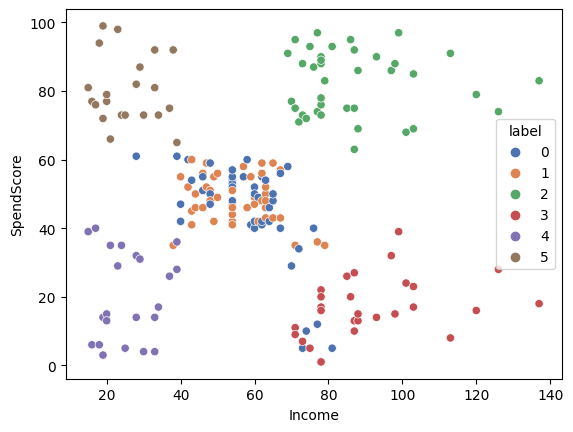

In [24]:
import seaborn as sns
sns.scatterplot(data=X, x='Income', y='SpendScore',hue='label',palette='deep')


### Dendogram Visualization

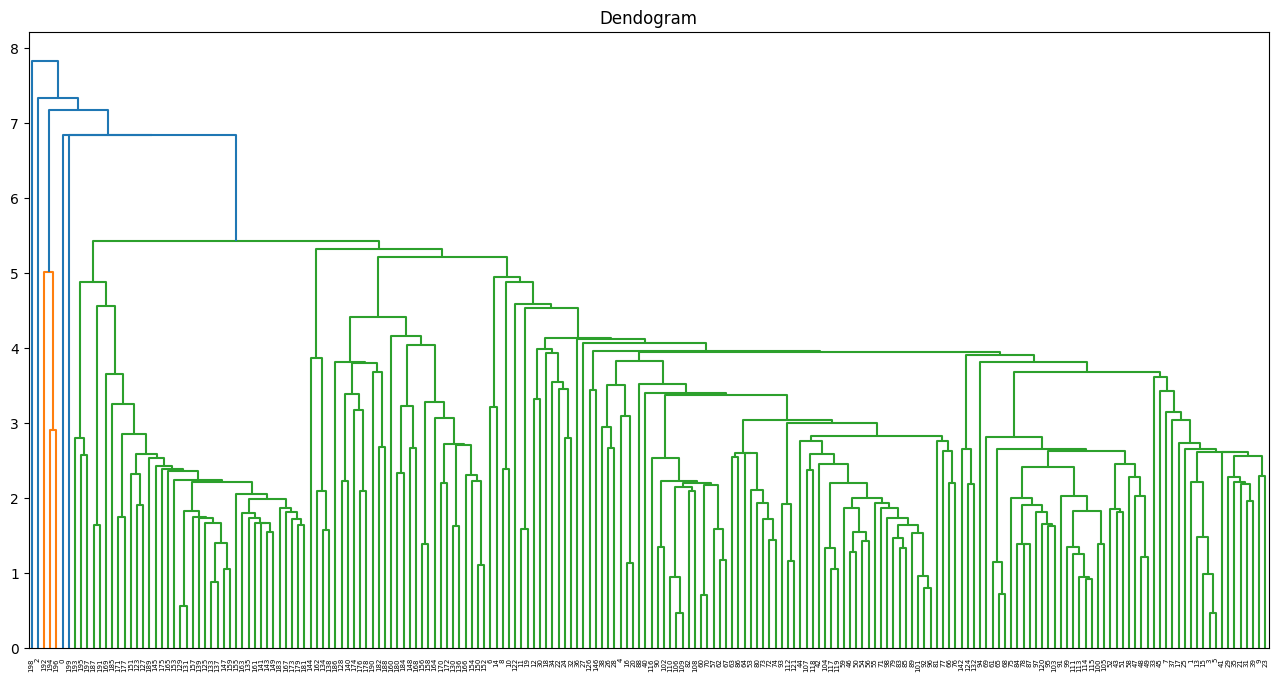

In [27]:
from scipy.spatial import distance_matrix
DM = distance_matrix(X_pre, X_pre)
from scipy.cluster.hierarchy import linkage
linkages = linkage(DM)
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(16,8))
plt.title('Dendogram')
Q = dendrogram(linkages)